# Data Preprocessing 2

**[실습 유의 사항]**

https://docs.google.com/spreadsheets/d/1LufpYknSbN7179sVPreZ-hDJ7vHaZ1l64XMZeivjySQ/edit?usp=sharing

공유한 파일에 실습 현황을 공유해 주세요. 수업 진행에 도움이 됩니다.

In [93]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='LG Smart UI')

In [94]:
from sklearn import datasets, linear_model
from sklearn import preprocessing

---




**문제1 전복의 암수 구별**

전복의 성별, 크기, 무게가 들어있는 데이터를 분석해봅시다.

전복의 성별에 따라서 크기와 무게가 연관성이 있는지 살펴보고 싶습니다.

따라서, 원할한 분석을 위해서 데이터 전처리를 진행해봅시다.

먼저 전복 데이터를 읽어와야 합니다.

Pandas의 read_csv를 이용해서 전복 데이터를 읽어봅시다.

```
df = pd.read_csv('/content/nan_abalone.csv', index_col=0)
```


In [41]:
df = pd.read_csv('nan_abalone.csv', index_col=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4165 non-null   object 
 1   length          4162 non-null   float64
 2   diameter        4162 non-null   float64
 3   height          4159 non-null   float64
 4   whole_weight    4164 non-null   float64
 5   shucked_weight  4171 non-null   float64
 6   viscera_weight  4165 non-null   float64
 7   shell_weight    4168 non-null   float64
dtypes: float64(7), object(1)
memory usage: 293.7+ KB


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [42]:
print(df.isnull().sum())
df.isna().sum()

sex               12
length            15
diameter          15
height            18
whole_weight      13
shucked_weight     6
viscera_weight    12
shell_weight       9
dtype: int64


sex               12
length            15
diameter          15
height            18
whole_weight      13
shucked_weight     6
viscera_weight    12
shell_weight       9
dtype: int64

첫번째 column을 index로 사용하기 위해서 index_col 옵션을 사용합니다.

이제 읽어온 바탕으로 데이터 전처리를 수행해 봅시다.

In [43]:
for items in df.iteritems():
    print(type(items))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


---

**문제1-1 Nan Value 처리하기**

데이터를 실펴보시면, 곳곳에 Nan 값이 있는 것을 확인하실 수 있습니다.

이 Nan 값을 처리해봅시다.

먼저, 저희가 분석하고자 하는 것은 성별에 따라서 크기와 무게에 차이가 있는지 알아보고자 하는 것 입니다.

따라서 'sex' column에 Nan이 있는 data는 row 자체를 삭제하도록 하겠습니다.

그리고 'sex' column 이외의 data에 있는 Nan은 해당 column의 평균 값으로 대체해보세요.

In [44]:
#nba_df.dropna(subset=['Age'])
df = df.dropna(subset=['sex'])

for col in df.columns:
    if col != 'sex':
        df[col].fillna(value=df[col].mean(), inplace=True)

df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
dtype: int64

---

**문제1-2 상관 관계에 있는 Data 처리하기**

데이터는 다음과 같이 구성되어 있습니다.
1. 크기와 관련된 데이터
  - length
  - diameter
  - height
2. 무게와 관련된 데이터
  - whole_weight
  - shucked_weight
  - viscera_weight
  - shell_weight

해당 데이터들이 서로 상관 관계가 있을 것으로 예상이 됩니다.
- 길이가 길면, 지름도 길 것이고, 높이도 높을 것입니다.
- 전체 무게가 무거우면, 껍질 무게도 무거울 것이고, 내장 무게도 무거울 것입니다.

따라서, 크기와, 무게 데이터로 분류하여 그래프를 그려 확인해봅시다.

1. 크기와 관련된 데이터 그래프
  - 간단하게 plt.plot으로 무게들의 추이를 살펴봅시다.
  - 모든 데이터를 전부 표시하면 그래프를 한 눈에 보기 힘들기 때문에 100개 간격 마다 하나씩 표시합니다.
    - 예) df['length'][::100]을 plot 해보세요.
  - 하나의 figure안에 크기와 관련된 모든 data를 같이 plot해 보세요
  - 간단한 확인용이기 떄문에 색과 같은 디테일은 신경쓰지 않으셔도 됩니다. 

In [45]:
df.loc[:, ['diameter', 'height']]

,diameter,height
0,0.365,0.095
1,0.265,0.090
2,0.420,0.135
3,0.365,0.125
4,0.255,0.080
...,...,...
4172,0.450,0.165
4173,0.440,0.135
4174,0.475,0.205
4175,0.485,0.150


In [46]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(df.loc[:, ['diameter', 'height']], df.length)
linear_reg.coef_, linear_reg.intercept_

(array([1.16425785, 0.07109478]), 0.03921489721434507)

In [47]:
import statsmodels.api as sm
osl_model = sm.OLS.from_formula('length~diameter+height', df)
result = osl_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 length   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 5.967e+04
Date:                Fri, 14 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:07:07   Log-Likelihood:                 9988.2
No. Observations:                4165   AIC:                        -1.997e+04
Df Residuals:                    4162   BIC:                        -1.995e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0392      0.001     27.133      0.000       0.036       0.042
diameter       1.1643      0.006    188.491      0.000       1.152       1.176
height         0.0711      0.015      4.853      0.000       0.042       0.100
==============================================================================
Omnibus:                     1372.731   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           241028.788
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                      40.261   Cond. No.                         49.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# whole_weight      0
# shucked_weight    0
# viscera_weight    0
# shell_weight      0
osl_model_weight = sm.OLS.from_formula('whole_weight~shucked_weight+viscera_weight+shell_weight', df)
result_w = osl_model_weight.fit()
result_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           whole_weight   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.010e+05
Date:                Fri, 14 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:07:08   Log-Likelihood:                 6028.4
No. Observations:                4165   AIC:                        -1.205e+04
Df Residuals:                    4161   BIC:                        -1.202e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0062      0.002     -3.531      0.000      -0.010      -0.003
shucked_weight     0.9319      0.011     83.630      0.000       0.910       0.954
viscera_weight     1.0856      0.025     43.181      0.000       1.036       1.135
shell_weight       1.2722      0.015     82.187      0.000       1.242       1.303
==============================================================================
Omnibus:                     2501.308   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1498356.144
Skew:                          -1.506   Prob(JB):                         0.00
Kurtosis:                      95.870   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#결과 그래프

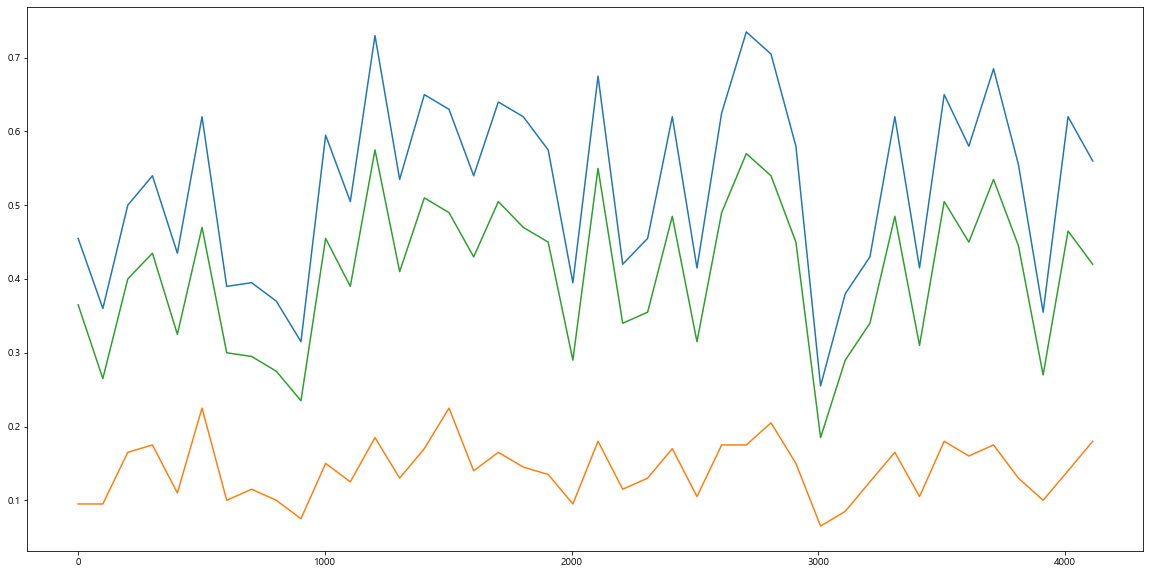

In [50]:
#여기에 그래프를 위한 코드를 작성해보세요
plt.figure(figsize=(20, 10))
plt.plot(df['length'][::100])
plt.plot(df['height'][::100])
plt.plot(df['diameter'][::100])
plt.show()

그래프를 보시면 모든 데이터들이 비슷한 경향성을 갖고 있는 것을 확인할 수 있습니다.

마찬가지로 무게에 대해서도 동일하게 표현해보세요

In [51]:
#결과 그래프

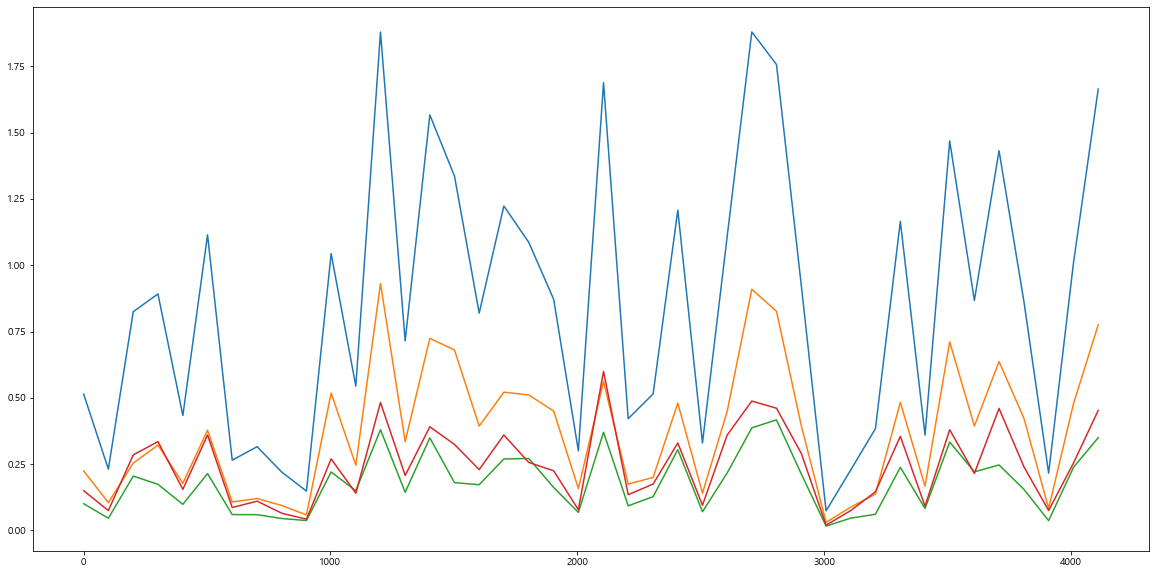

In [52]:
#여기에 그래프를 위한 코드를 작성해보세요
#여기에 그래프를 위한 코드를 작성해보세요
#   - whole_weight
#   - shucked_weight
#   - viscera_weight
#   - shell_weight
plt.figure(figsize=(20, 10))
plt.plot(df['whole_weight'][::100])
plt.plot(df['shucked_weight'][::100])
plt.plot(df['viscera_weight'][::100])
plt.plot(df['shell_weight'][::100])
plt.show()

무게도 비슷한 경향성을 보입니다.

각 요소들 간의 차이점이라고 한다면, scale의 차이입니다.

또한, 크기와 무게 데이터 사이에도 scale의 차이가 보입니다.

따라서, scaling을 진행해서 다시 확인해보겠습니다.

scaling은 sklearn의 preprocessing에 있는 StandardScaler를 이용하도록 하겠습니다.

각 column에 대해서 scaling을 진행한 후, 위에서 그렸던 그래프와 동일한 방법으로 그래프를 그려봅시다.

In [53]:
#결과 그래프

In [57]:
from sklearn.preprocessing import LabelEncoder
df.head()
pd.get_dummies(df, columns=['sex'])
LabelEncoder().fit_transform(df['sex'])

array([2, 2, 0, ..., 2, 0, 2])

In [62]:
df.iloc[:, 1:]
df.columns[:1]

Index(['sex'], dtype='object')

In [102]:
#여기에 그래프를 위한 코드를 작성해보세요
scaler = preprocessing.StandardScaler()
scaler_df = scaler.fit_transform(df.iloc[:, 1:])
scaler_df = pd.DataFrame(scaler_df, columns=df.columns[1:])
scaler_df['sex'] = df['sex']

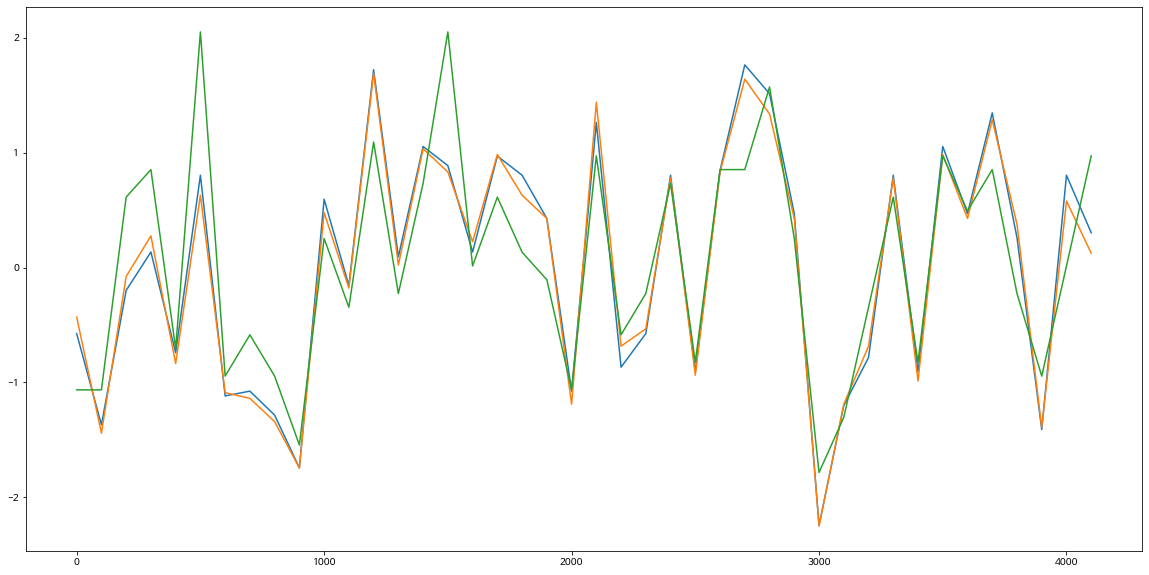

In [ ]:
#결과 그래프

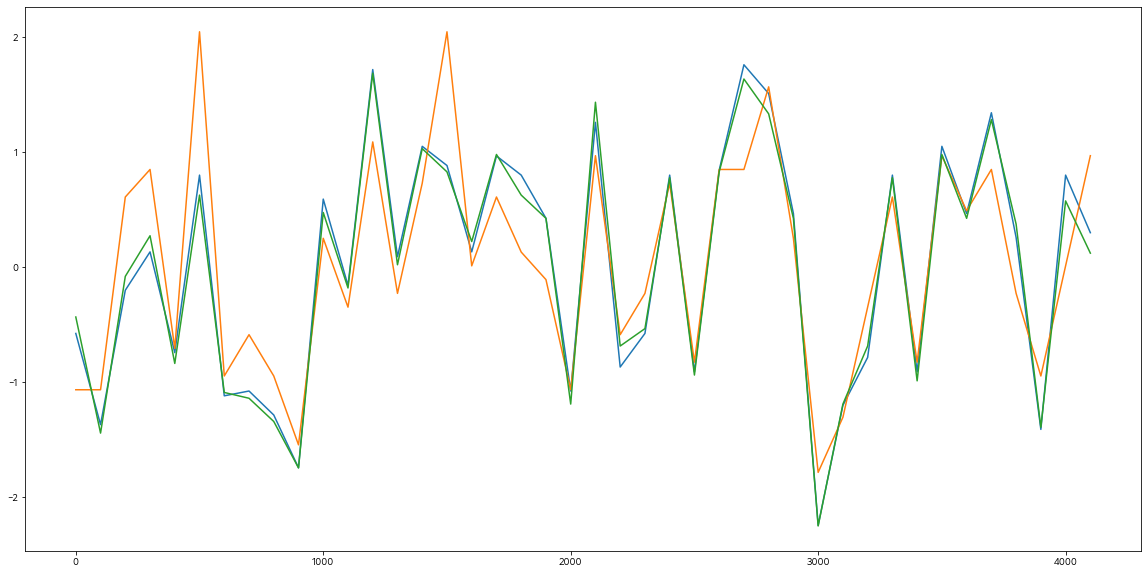

In [99]:
#여기에 그래프를 위한 코드를 작성해보세요
plt.figure(figsize=(20, 10))
plt.plot(scaler_df['length'][::100])
plt.plot(scaler_df['height'][::100])
plt.plot(scaler_df['diameter'][::100])
plt.show()

In [101]:
scaler_df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,-0.574561,-0.431529,-1.064424,-0.641547,-0.607100,-0.725916,-0.637699
1,-1.451021,-1.441396,-1.184191,-1.231587,-1.171479,-1.205752,-1.213496
2,0.051481,0.123897,-0.106281,-0.308180,-0.462619,-0.355756,-0.205852
3,-0.699770,-0.431529,-0.345816,-0.637457,-0.647735,-0.607099,-0.601712
4,-1.617966,-1.542383,-1.423727,-1.273513,-1.216629,-1.288009,-1.321458


보이시는 것 처럼, scaling을 적용하고 난 후 데이터들은 매우 유사한 형태를 갖고 있는 것을 확인할 수 있습니다.

분석에 용이하도록, 유사한 데이터를 제거하여 feture 수를 줄여봅시다.

크기 부분에서는 'length'만, 무게 부분에서는 'whole_weight' 만 남겨서 사용하도록 하겠습니다.

```
df_drop = df[['sex', 'length', 'whole_weight']]
```

In [103]:
df_drop = scaler_df[['sex', 'length', 'whole_weight']]

---

**문제1-3 Handling Outliers**

먼저, 다루기 편하도록 성별에 따른 data들로 분류해 보겠습니다.

```
df_m = df_drop[df_drop['sex'] == 'M']
df_f = df_drop[df_drop['sex'] == 'F']
df_i = df_drop[df_drop['sex'] == 'I']
```

여기서 M은 수컷, F는 암컷, I(Intersex : 간성)는 암컷, 수컷으로 구분 짓기 어려운 경우를 의미합니다.

Outlier가 있는 것을 확인해보기 위해서 boxplot을 그려보겠습니다.

boxplot은 다음의 조건을 만족합니다.

1. 총 2개의 figure로 이루어져 있습니다.
  - figure(1)은 'length'와 관련된 data를 표시합니다.
  - figure(2)은 'whole_weight'와 관련된 data를 표시합니다.
2. 각 figure는 3개의 subplot을 갖습니다.
  - subplot은 (1, 3)의 형태로 나열되어 있습니다. (가로로 3개)
  - 3개의 subplot은 순서대로 M, F, I에 해당하는 data를 표시합니다.
  - 즉, 첫 번째 figure의 2번째 subplot은 암컷의 길이를 나타냅니다.
3. 총 6개의 그래프에 각각 맞는 boxplot을 그려보세요
  - 간단한 확인을 위해서 DataFrame에서 직접 boxplot을 그리는 방법을 사용해보세요
  - figure(1)에 해당되는 그래프들의 y축은 (-4, 3)의 범위를 표현하도록 합니다.
    - ylim 함수를 사용해보세요
  -figure(2)에 해당되는 그래프들의 y축은 (-2, 5)의 범위를 표현하도록 합니다.

위에서 언급되지 않은 조건들은 전부 무시하셔도 됩니다.


(-2.0, 5.0)

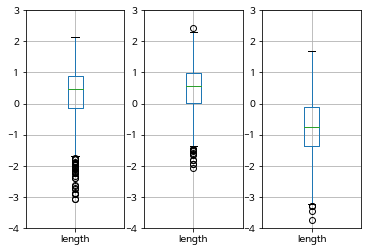

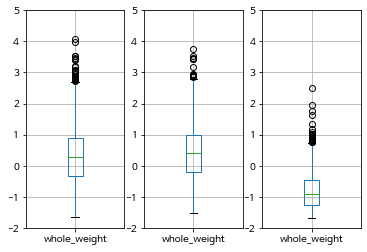

In [ ]:
#결과 그래프

([<matplotlib.axis.XTick at 0x19e0b990f10>], [Text(1, 0, 'whole_weight')])

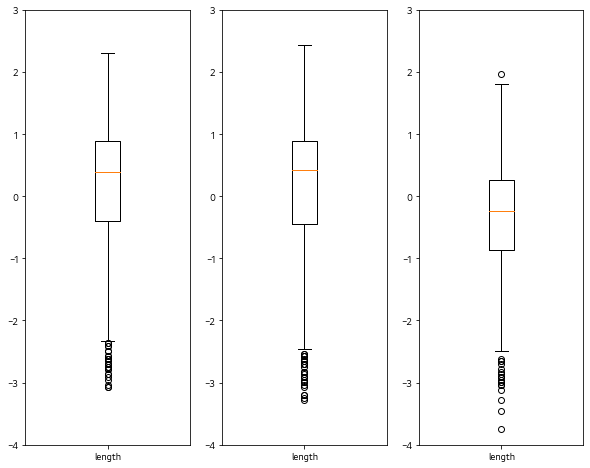

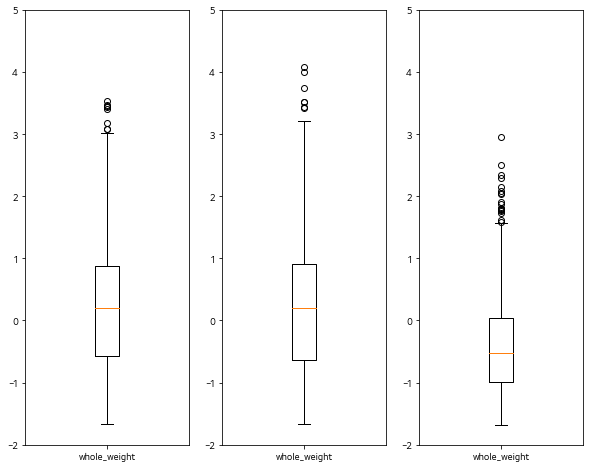

In [131]:
#여기에 그래프를 위한 코드를 작성해보세요
df_m = df_drop[df_drop['sex'] == 'M']
df_f = df_drop[df_drop['sex'] == 'F']
df_i = df_drop[df_drop['sex'] == 'I']

plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.ylim(-4, 3)

plt.boxplot(df_m.loc[:, 'length'])
plt.xticks([1], ["length"])

plt.subplot(1, 3, 2)
plt.ylim(-4, 3)
plt.boxplot(df_f.length)
plt.xticks([1], ["length"])

plt.subplot(1, 3, 3)
plt.ylim(-4, 3)
plt.boxplot(df_i.length)
plt.xticks([1], ["length"])

plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.ylim(-2, 5)

plt.boxplot(df_m.loc[:, 'whole_weight'])
plt.xticks([1], ["whole_weight"])

plt.subplot(1, 3, 2)
plt.ylim(-2, 5)
plt.boxplot(df_f.whole_weight)
plt.xticks([1], ["whole_weight"])

plt.subplot(1, 3, 3)
plt.ylim(-2, 5)
plt.boxplot(df_i.whole_weight)
plt.xticks([1], ["whole_weight"])


결과를 살펴보시면, 각 data 마다 outlier들이 있는 것을 확인할 수 있고,

Clipping을 하여 해당 outlier들을 제거해보겠습니다.

Clipping은 IQR Score를 사용하는 방식으로 수행하겠습니다.

모든 데이터들에 대해서 Clipping을 진행한 후에, 위에서 그렸던 방식과 동일하게 그래프를 그려보세요


(-2.0, 5.0)

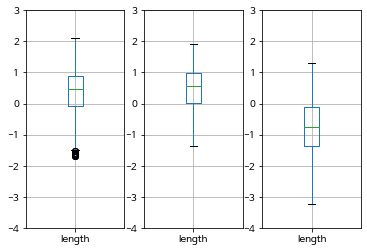

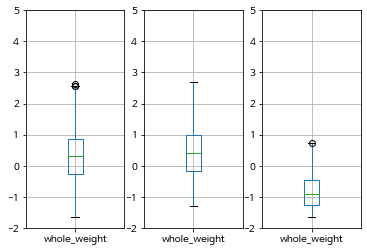

In [ ]:
#결과 그래프

In [140]:
#여기에 그래프를 위한 코드를 작성해보세요
# type(df_m.quantile(0.25))
df_m.quantile(0.25)
df_m.quantile(0.75)

df_array = [df_m, df_f, df_i]

#plt.figure(figsize=(10, 8))

for df_ in df_array:
    (h_q1, w_q1)  = df_.quantile(0.25)
    (h_q3, w_q3) = df_.quantile(0.75)
    print(h_q1, w_q1, h_q3, w_q3)


결과를 살펴보시면, 암컷과 수컷의 경우 크기와 무게만으로 성별을 구분해 내기는 쉽지 않아보입니다.

하지만 간성은 다른 성별에 비해서 작은 크기와 가벼운 무게를 갖고 있는 것을 확인할 수 있습니다.

---

**문제1-4 Label Encoding**

마지막으로, 'sex' column의 데이터를 수정하도록 하겠습니다.

'sex' column의 data들은 object 형태로 되어있어 데이터를 분석할 때 불편함이 있습니다.

이를 숫자로 변경해주기 위해서 sklearn의 LabelEncoder를 사용해보세요.


---

**문제2 Sklearn Encoder**

scikit-learn의 encoding을 연습해 봅시다.


---

**문제2-1**

sklearn의 encoder을 활용하여 data를 integer encoding 하세요.

```
data = ['bad', 'bad', 'not good', 'good', 'not good', 'bad', 'bad', 'good', 'good', 'not good']

>>> print(interger_encoded)
[0 0 2 1 2 0 0 1 1 2]
```

---

**문제2-2**

OneHotEncoder을 활용하여 integer_encoded를 binary encode 하세요.

```
>>> print(onehot_encoded)
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
```

---

**문제2-3**

onehot_encoded 데이터를 원래 데이터로 invert 해보세요.

```
inverted = ...(onehot_encoded[3, :])
>>> print(inverted)
['good']
```

---

**문제3 지하철 승객수와 소비자 물가지수 비교 분석**

소비자물가지수는 도시 가계의 평균적인 생계비 내지는 구매력의 변동을 측정하는데 유용한 물가지수입니다.

소비자물가지수가 10% 상승하면 종전의 소득으로 구매할 수 있는 상품 및 서비스의 수량이 10% 감소합니다.
 
이는 봉급생활자가 종전의 소비수준을 유지하기 위해 지출해야 하는 생계비가 10% 더 필요함을 의미합니다.

따라서 소비자물가지수는 대표적인 인플레이션 지표로 사용됩니다.

소비자 물가지수와 지하철 승객수의 상관관계를 분석해봅시다.

---

**문제3-1 2018년도 소비자 물가 지수(통계청)**

파일을 읽어 2018년도 소비자 물가 지수 정보를 받아옵시다.

```
consumer_index = pd.read_excel('ref_data.xlsx')
```

읽어온 소비자 물가 지수 데이터와 승객수 데이터의 연관성을 찾기 위해서 scikit-learn의 StandardScaler를 사용하여 scaling을 해보세요.

데이터는 '소비자물가지수' 만 사용하도록 하겠습니다.

---

**문제3-2 지하철 승객 수**

저번 실습자료와 동일하게 subway.csv로 부터 지하철 정보를 읽어와서,
각 달 마다 총 승하차 인원을 구해봅시다.

소비자 물가와 동일한 기간의 데이터를 추출하기 위해서 2018년의 1월부터 12월까지의 데이터를 사용합니다.

그리고, 소비자 물가 지수와 연관성을 살펴보기 위해 동일한 방법으로 scaling을 진행해보세요.

---

**문제3-3 소비자 물가 지수와 지하철 승객수의 상관관계**

문제 3-1과 문제 3-2에서 가공된 데이터를 하나의 figure에 같이 꺽은선 그래프로 표현해보세요

x축은 각 달을 의미하고 y축은 각 문제에서 가공한 데이터의 값을 의미합니다.


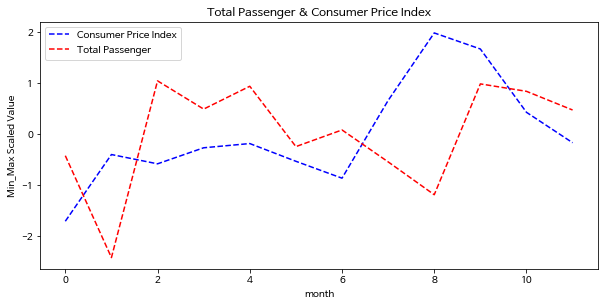

In [ ]:
#결과 그래프

In [ ]:
#여기에 그래프를 위한 코드를 작성해보세요

그래프를 비교해보면 비슷한 경향이 보이는데, 소비자 물가 지수가 승객수에 선행되는 것을 확인할 수 있습니다.

따라서, 승객수 데이터를 한달 당겨서 그래프를 다시 그려봅시다.

즉, 승객수 데이터의 2월에 해당하는 정보를 1월의 위치에 표시합니다.

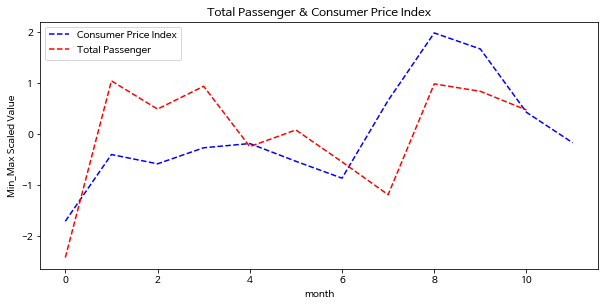

In [ ]:
#결과 그래프

In [ ]:
#여기에 그래프를 위한 코드를 작성해보세요

그래프를 보았을 때, 두 데이터가 어느정도 비슷한 경향성을 보이는 것을 확인할 수 있습니다.

약 한달의 시간차를 두고, 소비자 물가 지수가 상승하면 지하철 이용객의 수도 따라서 증가하고, 

물가 지수가 하락하면, 이용객 수도 따라서 줄어드는 것을 예측할 수 있습니다.